## Convergence checks in Stan.
* https://www.youtube.com/watch?v=0FdMZwIbJ_4&list=PLCrWEzJgSUqwL85xIj1wubGdY15C5Gf7H&index=5
* Key ideas: Central limit theorem

In [124]:
import numpy as np
import stan
import nest_asyncio
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
nest_asyncio.apply()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Example: Coin flips


In [125]:
tosses = np.random.binomial(1, 0.5, 5000)

In [126]:
means = [tosses[:n].mean() for n in range(1, len(tosses))]

In [127]:
means = np.array(means)

Text(0, 0.5, 'Mean of tosses')

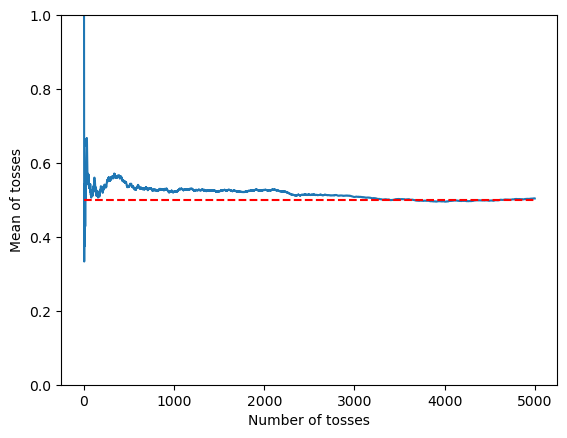

In [128]:
plot = sns.lineplot(x=range(1, len(tosses)), y=means)
plot.set_ylim(0, 1)
plot.hlines(0.5, 0, 5000, "red", "--")
plot.set_xlabel("Number of tosses")
plot.set_ylabel("Mean of tosses")

### Central limit theorem
$$ \lim_{N \rightarrow \inf}{P(\bar{X})} = N(\mu, \frac{\sigma}{\sqrt{N}}) $$

### Example : 8 School example from gelman

In [129]:
school_dat = {
    "n": 8,
    "y": [28, 8, -3, 7, -1, 1, 18, 12],
    "sigma": [15, 10, 16, 11, 9, 11, 10, 18],
}
school_code = """
data {
    int<lower=0> n; // number of schools
    vector[n] y; // estimated treatment effects
    vector<lower=0>[n] sigma; // s.e. of effect estimates
}
parameters {
    vector[n] theta; // treatment effects of each school
    real mu; // population treatment effect
    real<lower=0> tau; // standard deviation in treatment effects
}
model {
    // Hyper priors
    mu ~ normal(0, 5);
    tau ~ cauchy(0, 5);

    theta ~ normal(mu, sigma);

    //likelihood
    y ~ normal(theta, sigma);
}
"""

In [130]:
posterior = stan.build(school_code, data=school_dat, random_seed=42)

Building...



Building: found in cache, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


In [131]:
fit = posterior.sample(num_chains=4, num_samples=20, num_warmup=100)

Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!


           three stages of adaptation as currently configured.
           Reducing each adaptation stage to 15%/75%/10% of
           the given number of warmup iterations:
             init_buffer = 15
             adapt_window = 75
             term_buffer = 10
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!
           three stages of adaptation as currently configured.
           Reducing each adaptation stage to 15%/75%/10% of
           the given number of warmup iterations:
             init_buffer = 15
             adapt_window = 75
             term_buffer = 10
  Gradient evaluation took 4.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
  Adjust your expectations accordingly!
           three stages of adaptation as currently configured.
           Reducing each adaptation stage to 15%/75%/10% of
           the gi

In [132]:
fit["mu"][0]
fit["tau"][0]

array([3.70804247e+01, 2.36592543e+00, 1.02118164e+00, 8.76106143e+00,
       1.54693286e+01, 3.07196156e+01, 1.32278404e+00, 7.99443213e+01,
       1.62049608e+00, 9.37965498e+00, 7.16946145e+00, 5.26507867e-01,
       3.56805785e+00, 9.09749721e-01, 7.21152610e+00, 3.75699658e+01,
       3.91940213e+00, 1.19639455e+00, 6.83394896e+00, 1.19331189e+01,
       5.84561246e+00, 2.11842139e+01, 3.14804127e-01, 5.61542537e-01,
       3.22043178e+00, 1.16972209e+00, 5.01894271e-01, 3.03546661e+01,
       7.53523757e+00, 1.47954780e-02, 7.91623349e-01, 2.35070403e+01,
       5.90514041e+00, 5.89490260e-01, 6.32531185e+01, 1.55431347e+01,
       3.11952668e+02, 5.80716666e-01, 2.76491688e+00, 1.60953368e+00,
       3.88900469e-01, 5.70943977e+01, 8.45452204e+00, 1.61204032e+00,
       3.34278869e+00, 3.69584125e-01, 1.68890301e+03, 1.22815841e+01,
       1.21738702e+01, 6.00023004e+01, 5.71118418e+02, 1.69609729e+00,
       5.69333002e-01, 1.03619806e+02, 1.24576151e+03, 1.72135814e+01,
      

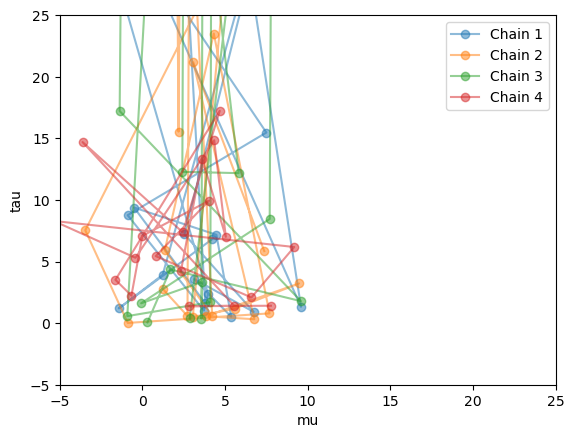

In [133]:
plt.plot(fit["mu"][0][:19], fit["tau"][0][:19], "o-", alpha=0.5, label="Chain 1")
plt.plot(fit["mu"][0][20:39], fit["tau"][0][20:39], "o-", alpha=0.5, label="Chain 2")
plt.plot(fit["mu"][0][40:59], fit["tau"][0][40:59], "o-", alpha=0.5, label="Chain 3")
plt.plot(fit["mu"][0][60:79], fit["tau"][0][60:79], "o-", alpha=0.5, label="Chain 4")
plt.xlabel("mu")
plt.ylabel("tau")
plt.xlim(-5, 25)
plt.ylim(-5, 25)
plt.legend()

### traceplot

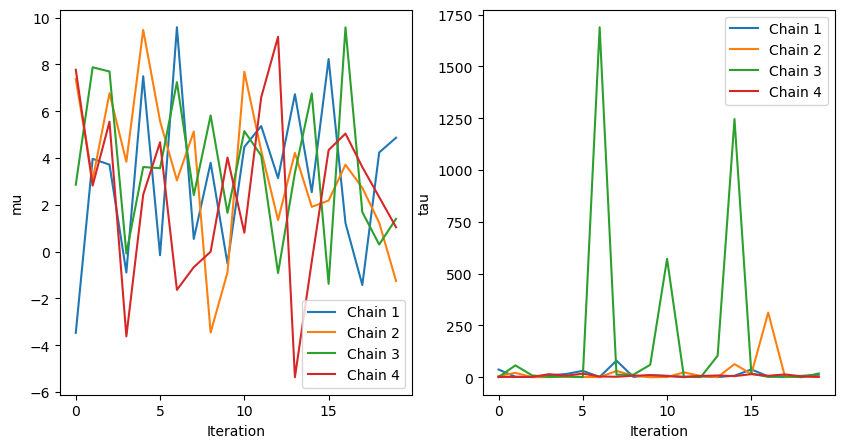

In [134]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(fit["mu"][0][:20], label="Chain 1")
ax[0].plot(fit["mu"][0][20:40], label="Chain 2")
ax[0].plot(fit["mu"][0][40:60], label="Chain 3")
ax[0].plot(fit["mu"][0][60:80], label="Chain 4")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("mu")
ax[0].legend()

ax[1].plot(fit["tau"][0][:20], label="Chain 1")
ax[1].plot(fit["tau"][0][20:40], label="Chain 2")
ax[1].plot(fit["tau"][0][40:60], label="Chain 3")
ax[1].plot(fit["tau"][0][60:80], label="Chain 4")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("tau")
ax[1].legend()

In [135]:
fit_1000 = posterior.sample(num_chains=4, num_samples=1000, num_warmup=100)

Sampling:   0%


Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
           three stages of adaptation as currently configured.
           Reducing each adaptation stage to 15%/75%/10% of
           the given number of warmup iterations:
             init_buffer = 15
             adapt_window = 75
             term_buffer = 10
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
           three stages of adaptation as currently configured.
           Reducing each adaptation stage to 15%/75%/10% of
           the given number of warmup iterations:
             init_buffer = 15
             adapt_window = 75
             term_buffer = 10
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog st

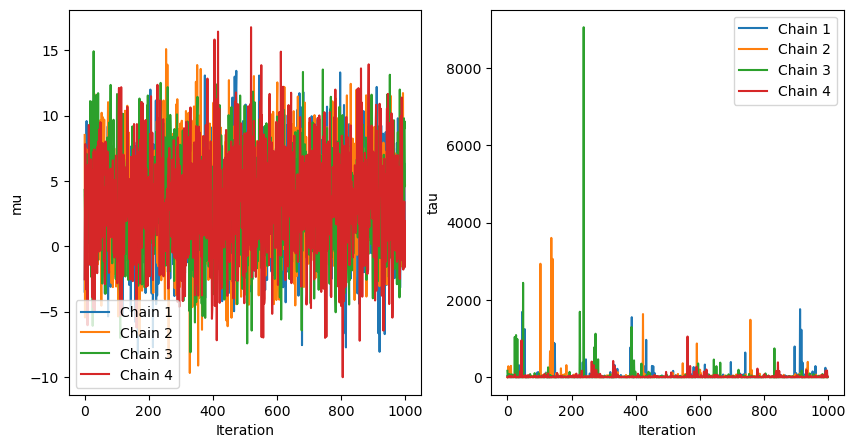

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(fit_1000["mu"][0][:1000], label="Chain 1")
ax[0].plot(fit_1000["mu"][0][1000:2000], label="Chain 2")
ax[0].plot(fit_1000["mu"][0][2000:3000], label="Chain 3")
ax[0].plot(fit_1000["mu"][0][3000:4000], label="Chain 4")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("mu")
ax[0].legend()

ax[1].plot(fit_1000["tau"][0][:1000], label="Chain 1")
ax[1].plot(fit_1000["tau"][0][1000:2000], label="Chain 2")
ax[1].plot(fit_1000["tau"][0][2000:3000], label="Chain 3")
ax[1].plot(fit_1000["tau"][0][3000:4000], label="Chain 4")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("tau")
ax[1].legend()

### R_hat
* number of parameters is very large, it is difficult to check the convergence of the parameters by looking at the trace plot.
* R_hat is a measure of the convergence of the parameters.
$$\hat{R} = \frac{\hat{V}}{W}$$
* where $\hat{V}$ is the pooled variance of all chain and $W$ is the average of the each chain variance.

$$ \hat{V} = \frac{N-1}{N}W + \frac{M+1}{MN}B$$
$$ W = \frac{1}{M}\sum_{m=1}^{M} \hat{\sigma}_m^2$$
$$ B = \frac{N}{M-1}\sum_{m=1}^{M}(\bar{\theta}_m - \bar{\theta})^2$$
* where $M$ is the number of chains, $N$ is the number of samples in each chain, $\hat{\sigma}_m^2$ is the variance of the $m^{th}$ chain, $\bar{\theta}_m$ is the mean of the $m^{th}$ chain and $\bar{\theta}$ is the posterior mean. Therefore, $B$ is the variance between the chains.
* Therefore, $\hat{R}$ is the ratio of the variance between the chains to the variance within the chains. If $\hat{R}$ is close to 1, then the chains have converged.



In [137]:
print(fit_1000)

<stan.Fit>
Parameters:
    theta: (8,)
    mu: ()
    tau: ()
Draws: 4000


In [138]:
import arviz as az

In [139]:
az.summary(fit_1000)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta[0],15.458,10.706,-5.286,35.332,0.202,0.149,2797.0,2339.0,1.0
theta[1],5.781,7.268,-7.937,19.136,0.106,0.091,4718.0,2858.0,1.0
theta[2],0.522,11.348,-22.208,21.005,0.211,0.202,2882.0,2205.0,1.0
theta[3],5.153,8.077,-9.521,20.301,0.124,0.117,4307.0,2749.0,1.0
theta[4],1.161,6.642,-11.311,13.501,0.097,0.111,4698.0,3073.0,1.0
theta[5],2.212,7.915,-12.920,16.711,0.120,0.121,4330.0,2923.0,1.0
theta[6],10.647,7.249,-3.153,23.971,0.105,0.084,4771.0,3034.0,1.0
theta[7],7.678,12.654,-15.382,32.425,0.264,0.197,2298.0,2606.0,1.0
mu,3.306,3.804,-4.094,10.060,0.060,0.046,4006.0,3087.0,1.0
tau,26.931,198.102,0.006,52.418,3.910,2.765,3868.0,2249.0,1.0


array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>]],
      dtype=object)

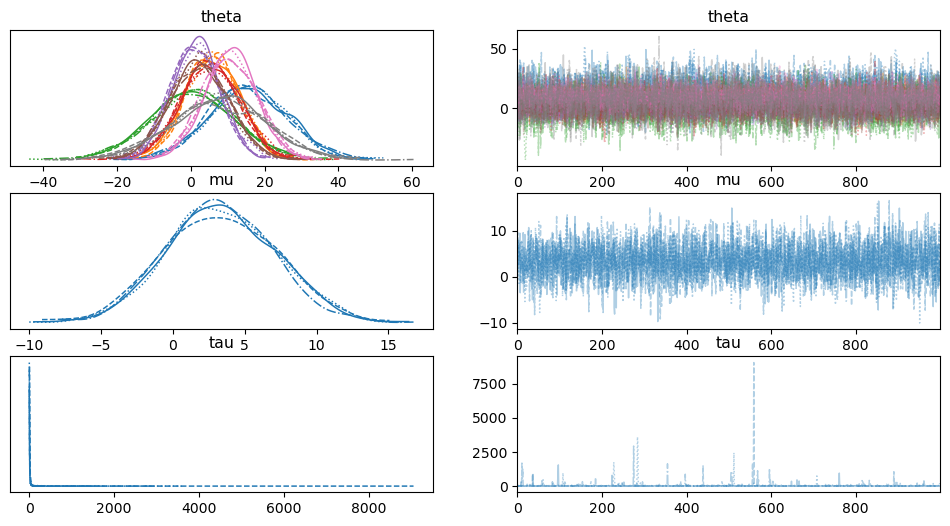

In [140]:
az.plot_trace(fit_1000)

In [141]:
fit_1000["theta"].shape

(8, 4000)

In [142]:
fit_1000["mu"].shape

(1, 4000)

### Effective sample size
* The effective sample size is the number of independent samples that are equivalent to the number of samples in the chain.


In [143]:
summary = az.summary(fit_1000)

In [144]:
summary.columns

Index(['mean', 'sd', 'hdi_3%', 'hdi_97%', 'mcse_mean', 'mcse_sd', 'ess_bulk',
       'ess_tail', 'r_hat'],
      dtype='object')

In [145]:
ess = az.ess(fit)

In [146]:
print(ess)

<xarray.Dataset>
Dimensions:      (theta_dim_0: 8)
Coordinates:
  * theta_dim_0  (theta_dim_0) int64 0 1 2 3 4 5 6 7
Data variables:
    theta        (theta_dim_0) float64 62.35 82.61 25.88 ... 128.3 134.9 44.76
    mu           float64 91.63
    tau          float64 70.27


In [147]:
ess_t = ess["theta"]

In [148]:
ess_t

<xarray.DataArray 'theta' (theta_dim_0: 8)>
array([ 62.35356636,  82.60796323,  25.88371118,  79.12934763,
       152.24719896, 128.31245172, 134.93362035,  44.76420736])
Coordinates:
  * theta_dim_0  (theta_dim_0) int64 0 1 2 3 4 5 6 7

In [150]:
np.array(ess_t) / 2000

array([0.03117678, 0.04130398, 0.01294186, 0.03956467, 0.0761236 ,
       0.06415623, 0.06746681, 0.0223821 ])

### Divergence

In [155]:
idata = az.from_pystan(posterior=fit_1000)

In [156]:
divergence = idata.sample_stats["diverging"]

In [157]:
num_divergences = divergence.sum()

In [158]:
print(num_divergences)

<xarray.DataArray 'diverging' ()>
array(0)


In [160]:
idata

Inference data with groups:
	> posterior
	> sample_stats

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>]],
      dtype=object)

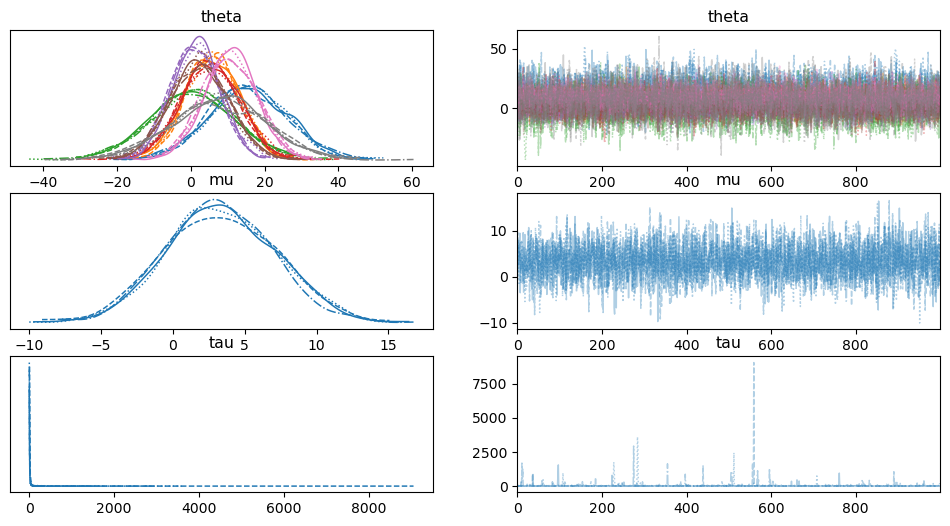

In [161]:
az.plot_trace(idata, divergences=True)

array([[<Axes: title={'center': 'mu\n0'}>,
        <Axes: title={'center': 'mu\n1'}>,
        <Axes: title={'center': 'mu\n2'}>,
        <Axes: title={'center': 'mu\n3'}>],
       [<Axes: title={'center': 'tau\n0'}>,
        <Axes: title={'center': 'tau\n1'}>,
        <Axes: title={'center': 'tau\n2'}>,
        <Axes: title={'center': 'tau\n3'}>]], dtype=object)

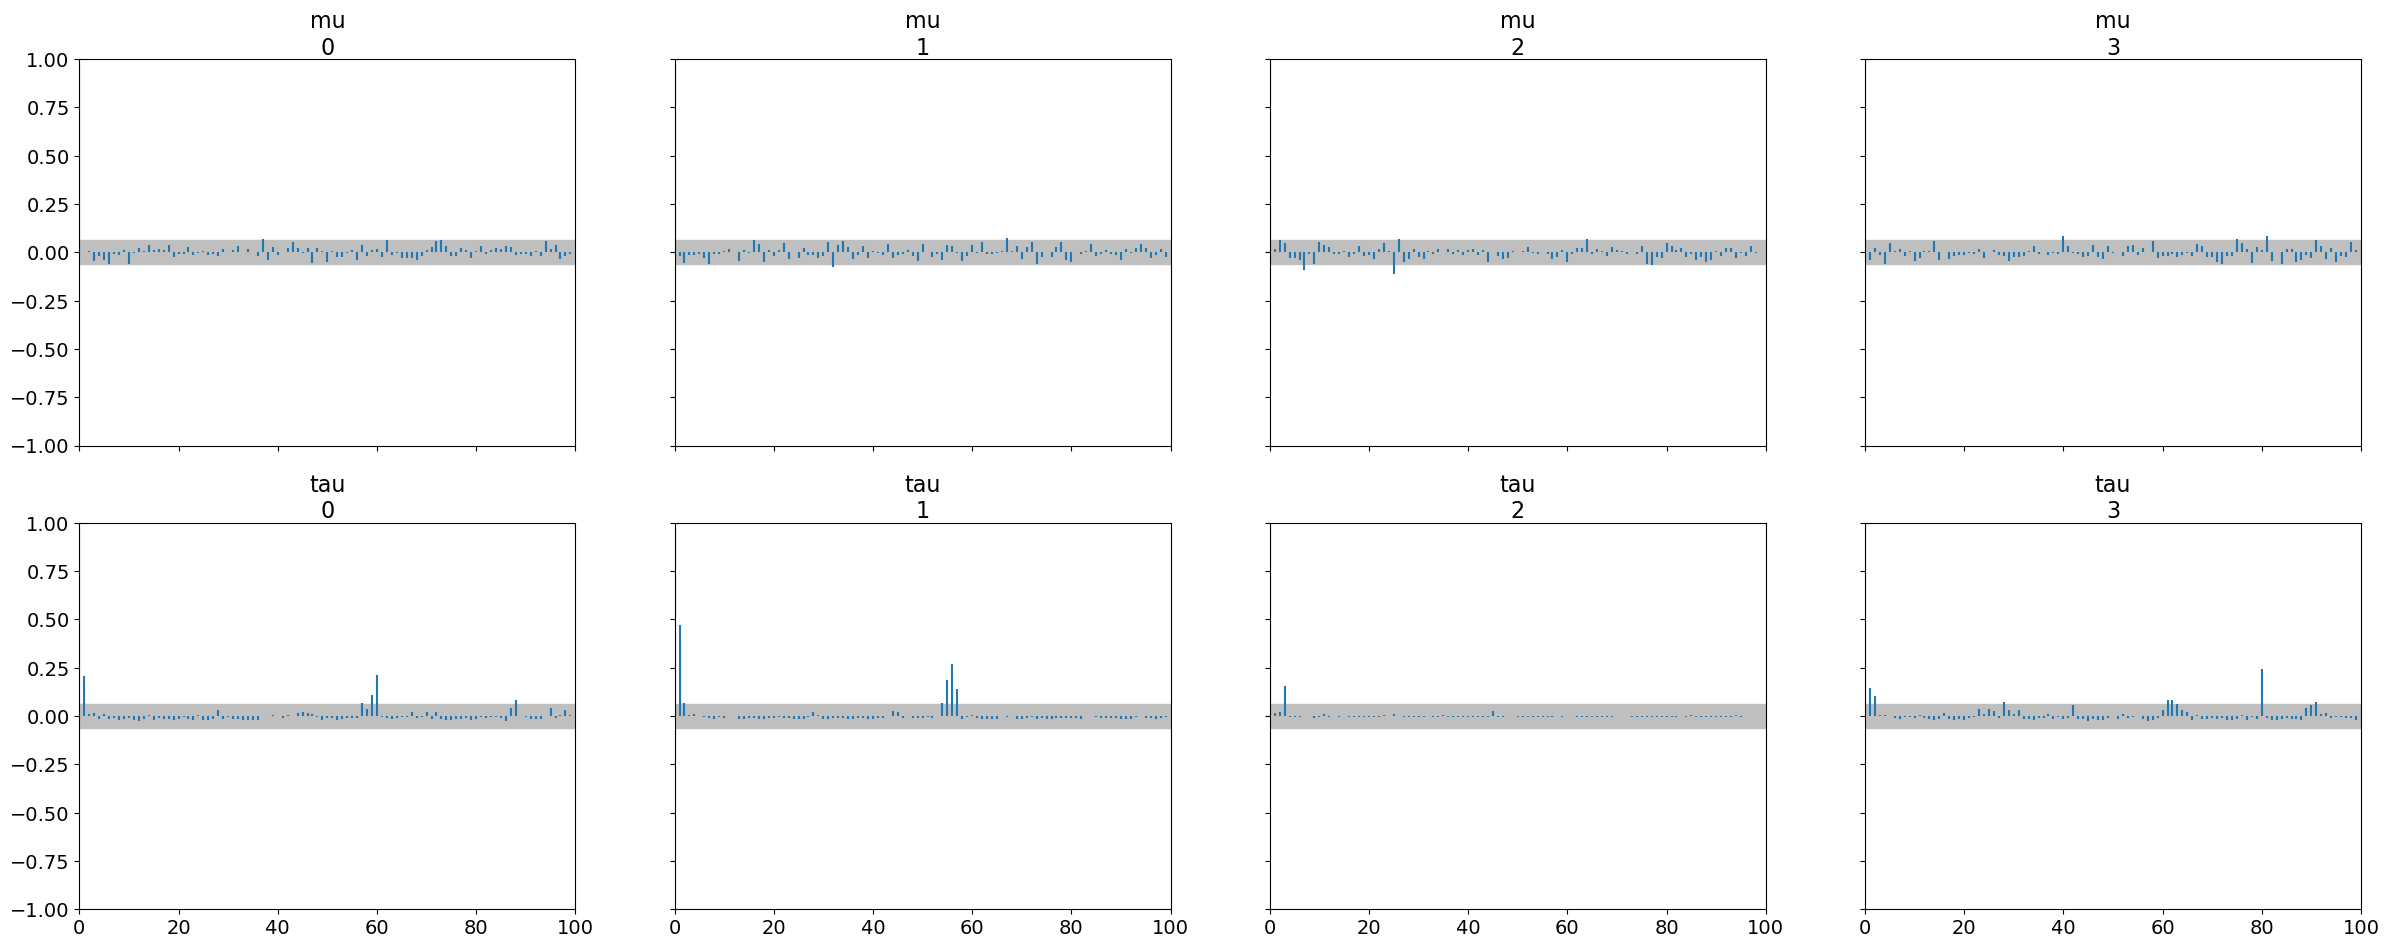

In [163]:
az.plot_autocorr(idata, var_names=["mu", "tau"])